In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Set-up

In [8]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import string
import time
import scipy.stats as st

os.chdir('/content/drive/MyDrive/Micron')

In [4]:
df = pd.read_excel("/content/drive/MyDrive/Micron/4) Micron NUS-ISE BACC 2025 Q2 RPT Data.xlsx")

In [5]:
df.head()

,H_1,I_2,J_3
0,1.521124,6.258362,1.560118
1,2.293860,9.407662,1.642984
2,1.359261,8.579790,3.070715
3,1.306989,3.643087,2.540902
4,2.720436,4.243985,1.868649


## Part 1 and 2

In [6]:
H_1 = df['H_1']
I_2 = df["I_2"]
J_3 = df["J_3"]

List_x = [x for x in range(len(H_1))]
print(len(List_x))

1000


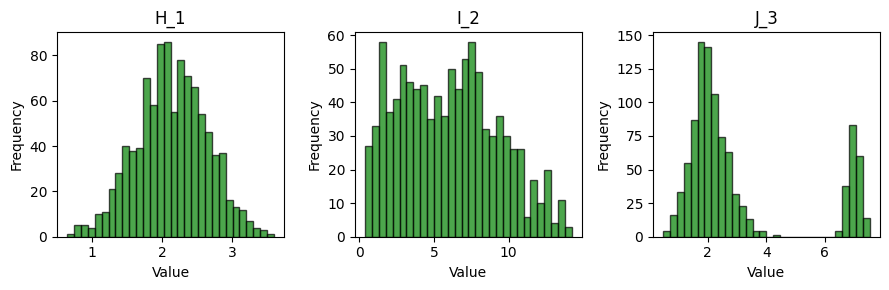

In [9]:
# Create a 3x1 subplot layout
fig, axes = plt.subplots(1, 3, figsize=(9, 3))  # 3 rows, 1 column

# Histogram
axes[0].hist(H_1, bins=30, color='green', edgecolor='black', alpha=0.7)
axes[0].set_title("H_1")
axes[0].set_xlabel("Value")
axes[0].set_ylabel("Frequency")

# Histogram
axes[1].hist(I_2, bins=30, color='green', edgecolor='black', alpha=0.7)
axes[1].set_title("I_2")
axes[1].set_xlabel("Value")
axes[1].set_ylabel("Frequency")

# Line Plot (Example)
axes[2].hist(J_3, bins=30, color='green', edgecolor='black', alpha=0.7)
axes[2].set_title("J_3")
axes[2].set_xlabel("Value")
axes[2].set_ylabel("Frequency")

# Adjust layout
plt.tight_layout()
plt.show()

Skipping poisson due to error: 'poisson_gen' object has no attribute 'fit'
Best-fitting distribution: gamma
Best parameters: (2270.547595983384, -21.748335517317912, 0.010517075594713002)
Best p-value: 0.7055416837367547


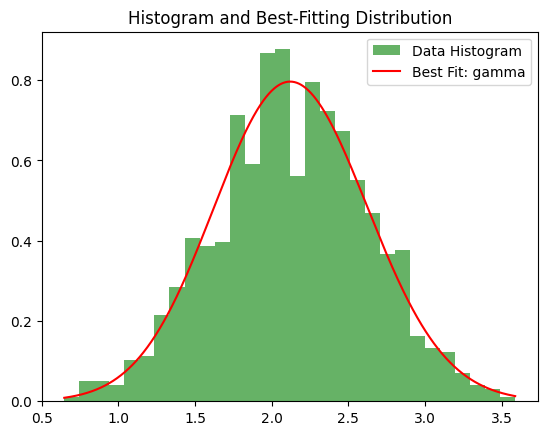

In [10]:
# Sample data (replace with your actual list of values)
data = H_1

# List of distributions to test
distributions = [
    st.norm, st.expon, st.gamma, st.beta, st.weibull_min,
    st.lognorm, st.chi2, st.f, st.t, st.poisson
]

# Fit each distribution and compute the Kolmogorov-Smirnov (KS) test
best_distribution = None
best_p_value = 0
best_params = None

for distribution in distributions:
    try:
        # Fit distribution to data
        params = distribution.fit(data)

        # Generate CDF for fitted distribution
        cdf_fitted = distribution.cdf(np.sort(data), *params)

        # Perform KS test
        ks_stat, p_value = st.kstest(data, distribution.name, args=params)

        # Keep track of the best distribution (highest p-value)
        if p_value > best_p_value:
            best_distribution = distribution
            best_p_value = p_value
            best_params = params

    except Exception as e:
        print(f"Skipping {distribution.name} due to error: {e}")

# Print the best-fitting distribution
if best_distribution:
    print(f"Best-fitting distribution: {best_distribution.name}")
    print(f"Best parameters: {best_params}")
    print(f"Best p-value: {best_p_value}")
else:
    print("No suitable distribution found.")

# Plot histogram and best-fitting PDF
plt.hist(data, bins=30, density=True, alpha=0.6, color='g', label='Data Histogram')

# Generate PDF for best-fitting distribution
if best_distribution:
    x = np.linspace(min(data), max(data), 1000)
    pdf_fitted = best_distribution.pdf(x, *best_params)
    plt.plot(x, pdf_fitted, label=f'Best Fit: {best_distribution.name}', color='red')

plt.legend()
plt.title("Histogram and Best-Fitting Distribution")
plt.show()


In [13]:
# Compute population mean and variance
H_1 = np.array(H_1)
sample_mean = H_1.mean()
sample_stdev = H_1.std(ddof=1)

# Print results
print(f"Estimated Sample Mean: {sample_mean}")
print(f"Estimated Sample SD: {sample_stdev}")


shape, loc, scale = st.gamma.fit(H_1, floc=0)  # Force loc=0
rate = 1 / scale  # Convert scale to rate (β = 1/scale)
print(shape, loc , scale, rate)

population_mean = shape * scale  # α / β
population_variance = shape * (scale ** 2)  # α / β²

print(f"Estimated Population Mean: {population_mean}")
print(f"Estimated Population Stdev: {np.sqrt(population_variance)}")

Estimated Sample Mean: 2.1316261381378303
Estimated Sample SD: 0.5007105720083864
16.59919676333599 0 0.12841742697129346 7.787105096129522
Estimated Population Mean: 2.1316261381378303
Estimated Population Stdev: 0.5231997170530726


Skipping poisson due to error: 'poisson_gen' object has no attribute 'fit'
Best-fitting distribution: beta
Best parameters: (1.31169474839079, 1.977322312036761, 0.3870701491083236, 14.023153649707545)
Best p-value: 0.16251659992759815


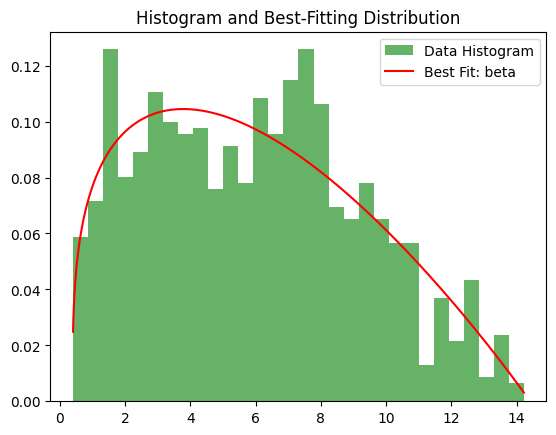

In [14]:
# Sample data (replace with your actual list of values)
data = I_2

# List of distributions to test
distributions = [
    st.norm, st.expon, st.gamma, st.beta, st.weibull_min,
    st.lognorm, st.chi2, st.f, st.t, st.poisson
]

# Fit each distribution and compute the Kolmogorov-Smirnov (KS) test
best_distribution = None
best_p_value = 0
best_params = None

for distribution in distributions:
    try:
        # Fit distribution to data
        params = distribution.fit(data)

        # Generate CDF for fitted distribution
        cdf_fitted = distribution.cdf(np.sort(data), *params)

        # Perform KS test
        ks_stat, p_value = st.kstest(data, distribution.name, args=params)

        # Keep track of the best distribution (highest p-value)
        if p_value > best_p_value:
            best_distribution = distribution
            best_p_value = p_value
            best_params = params

    except Exception as e:
        print(f"Skipping {distribution.name} due to error: {e}")

# Print the best-fitting distribution
if best_distribution:
    print(f"Best-fitting distribution: {best_distribution.name}")
    print(f"Best parameters: {best_params}")
    print(f"Best p-value: {best_p_value}")
else:
    print("No suitable distribution found.")

# Plot histogram and best-fitting PDF
plt.hist(data, bins=30, density=True, alpha=0.6, color='g', label='Data Histogram')

# Generate PDF for best-fitting distribution
if best_distribution:
    x = np.linspace(min(data), max(data), 1000)
    pdf_fitted = best_distribution.pdf(x, *best_params)
    plt.plot(x, pdf_fitted, label=f'Best Fit: {best_distribution.name}', color='red')

plt.legend()
plt.title("Histogram and Best-Fitting Distribution")
plt.show()


In [15]:
# Compute population mean and variance
I_2 = np.array(I_2)
sample_mean = I_2.mean()
sample_stdev = I_2.std(ddof=1)

# Print results
print(f"Estimated Sample Mean: {sample_mean}")
print(f"Estimated Sample SD: {sample_stdev}")

# Given estimated Beta parameters
alpha = 1.3117
beta = 1.9773
loc = 0.3871
scale = 14.0232

# Compute estimated population mean and variance
population_mean = loc + (alpha / (alpha + beta)) * scale
population_variance = (alpha * beta) / ((alpha + beta) ** 2 * (alpha + beta + 1)) * (scale ** 2)

# Print results
print(f"Estimated Population Mean: {population_mean}")
print(f"Estimated Population Variance: {np.sqrt(population_variance)}")

Estimated Sample Mean: 5.99186175928513
Estimated Sample SD: 3.292673621732793
Estimated Population Mean: 5.979751699604743
Estimated Population Variance: 3.315574370539171


/usr/local/lib/python3.11/dist-packages/scipy/stats/_continuous_distns.py:716: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


Skipping poisson due to error: 'poisson_gen' object has no attribute 'fit'
Best-fitting distribution: f
Best parameters: (12480.28852878723, 6.408721700394278, 0.11745448224608612, 2.014799743725817)
Best p-value: 1.9381412243542317e-16


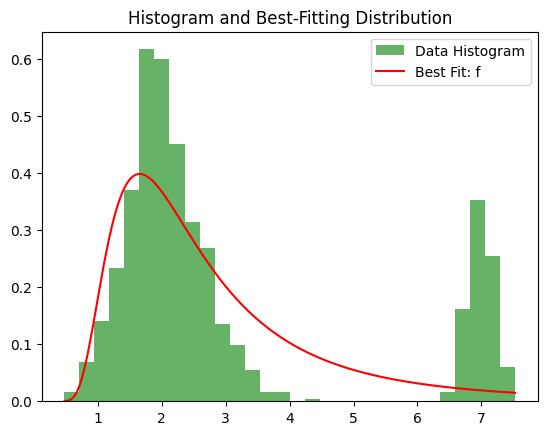

In [16]:
# Sample data (replace with your actual list of values)
data = J_3

# List of distributions to test
distributions = [
    st.norm, st.expon, st.gamma, st.beta, st.weibull_min,
    st.lognorm, st.chi2, st.f, st.t, st.poisson
]

# Fit each distribution and compute the Kolmogorov-Smirnov (KS) test
best_distribution = None
best_p_value = 0
best_params = None

for distribution in distributions:
    try:
        # Fit distribution to data
        params = distribution.fit(data)

        # Generate CDF for fitted distribution
        cdf_fitted = distribution.cdf(np.sort(data), *params)

        # Perform KS test
        ks_stat, p_value = st.kstest(data, distribution.name, args=params)

        # Keep track of the best distribution (highest p-value)
        if p_value > best_p_value:
            best_distribution = distribution
            best_p_value = p_value
            best_params = params

    except Exception as e:
        print(f"Skipping {distribution.name} due to error: {e}")

# Print the best-fitting distribution
if best_distribution:
    print(f"Best-fitting distribution: {best_distribution.name}")
    print(f"Best parameters: {best_params}")
    print(f"Best p-value: {best_p_value}")
else:
    print("No suitable distribution found.")

# Plot histogram and best-fitting PDF
plt.hist(data, bins=30, density=True, alpha=0.6, color='g', label='Data Histogram')

# Generate PDF for best-fitting distribution
if best_distribution:
    x = np.linspace(min(data), max(data), 1000)
    pdf_fitted = best_distribution.pdf(x, *best_params)
    plt.plot(x, pdf_fitted, label=f'Best Fit: {best_distribution.name}', color='red')

plt.legend()
plt.title("Histogram and Best-Fitting Distribution")
plt.show()


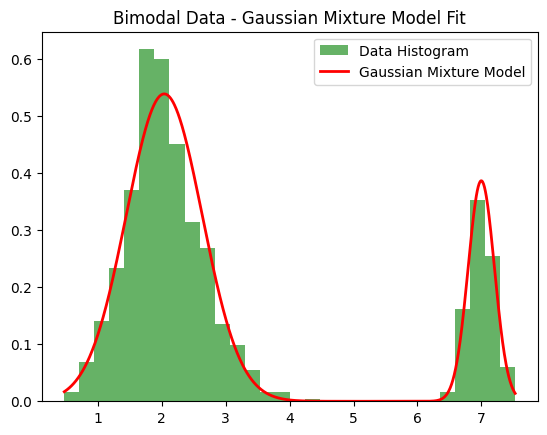

Component 1: Mean = 7.0004779267347645, Variance = 0.0422900529083596
Component 2: Mean = 2.0366605388995764, Variance = 0.3526679312847644


In [18]:
from sklearn.mixture import GaussianMixture

data = J_3

# Fit Gaussian Mixture Model (GMM) with 2 components
gmm = GaussianMixture(n_components=2, random_state=42)
gmm.fit(data.to_numpy().reshape(-1, 1))  # ✅ Convert Series to NumPy array first

# Generate fitted distribution
x = np.linspace(min(data), max(data), 1000)
pdf = np.exp(gmm.score_samples(x.reshape(-1, 1)))

# Plot histogram and fitted GMM
plt.hist(data, bins=30, density=True, alpha=0.6, color='g', label="Data Histogram")
plt.plot(x, pdf, label="Gaussian Mixture Model", color='red', linewidth=2)
plt.legend()
plt.title("Bimodal Data - Gaussian Mixture Model Fit")
plt.show()

# Print the mean and variance of each component
for i in range(2):
    print(f"Component {i+1}: Mean = {gmm.means_[i][0]}, Variance = {gmm.covariances_[i][0][0]}")


In [33]:
# Compute population mean and variance
J_3 = np.array(J_3)
sample_mean = J_3.mean()
sample_stdev = J_3.std(ddof=1)

# Print results
print(f"Estimated Sample Mean: {sample_mean}")
print(f"Estimated Sample SD: {sample_stdev}")

Estimated Sample Mean: 3.0244601990777378
Estimated Sample SD: 2.0549047002372025


In [39]:
proportion_under_4_5 = np.mean(J_3 < 4.5)

# Print result
print(f"Proportion of values under 4: {proportion_under_4_5:.4f}")

Proportion of values under 4: 0.8010


In [37]:
# Given GMM parameters
mu1, var1 = 7.0005, 0.04229  # Mean & variance of component 1
mu2, var2 = 2.0367, 0.35267  # Mean & variance of component 2

w1, w2 = 0.2, 0.8  # Default equal weighting (unless GMM provides different values)

# Compute estimated population mean
population_mean = w1 * mu1 + w2 * mu2

# Compute estimated population variance (law of total variance)
population_variance = (
    w1 * (var1 + (mu1 - population_mean) ** 2) +
    w2 * (var2 + (mu2 - population_mean) ** 2)
)

# Print results
print(f"Estimated Population Mean: {population_mean}")
print(f"Estimated Population Variance: {np.sqrt(population_variance)}")


Estimated Population Mean: 3.0294600000000003
Estimated Population Variance: 2.0573973049462273


## Part 3

In [20]:
rpt_node_1 = 2.1
rpt_node_2 = 6.0
rpt_node_3 = 2.1


r1,r2,r3 = 12000*rpt_node_1/(3*7*24*60*0.85) , 5000*rpt_node_2/(4*7*24*60*0.75) , 1000*rpt_node_3/(7*24*60*0.60)
r1,r2,r3

(0.9803921568627451, 0.9920634920634921, 0.3472222222222222)

## Part 4

### H_1 gamma distribution

In [61]:
# Given Gamma parameters
shape = 16.5992  # α (shape parameter)
loc = 0  # Location (fixed)
scale = 0.1284  # θ (scale parameter)
rate = 1 / scale  # β = 1/θ

mean_of_means = []
counter = 0

for i in range(100):
  # Monte Carlo Simulation: Generate 1,000,000 samples
  counter += 1
  num_samples = 1_000_000
  samples = np.random.gamma(shape, scale, size=num_samples)
  mean = samples.mean()
  mean_of_means.append(mean)
  print(counter)

mean_of_means = np.array(mean_of_means)
mean_of_means = mean_of_means.mean()
mean_of_means

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


2.131212887647161

### Beta

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

# Given Beta distribution parameters
alpha = 1.3117  # Shape parameter a
beta = 1.9773  # Shape parameter b
loc = 0.3871  # Location parameter
scale = 14.0232  # Scale parameter


mean_of_means = []
counter = 0

for i in range(100):
  # Monte Carlo Simulation: Generate 1,000,000 samples
  counter += 1
  num_samples = 1_000_000
  samples = np.random.beta(alpha, beta, size=num_samples) * scale + loc  # Transform to match (loc, scale)
  mean = samples.mean()
  mean_of_means.append(mean)
  print(counter)

mean_of_means = np.array(mean_of_means)
mean_of_means = mean_of_means.mean()
mean_of_means

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


5.979675613279482

### Mixed gaussian

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

# Given GMM parameters
means = np.array([7.0005, 2.0367])  # Component means
variances = np.array([0.0423, 0.3527])  # Component variances
weights = np.array([0.2, 0.8])  # Assume equal mixture weights if unknown

mean_of_means = []
counter = 0

for i in range(100):
  # Monte Carlo Simulation: Generate 1,000,000 samples
  counter += 1
  num_samples = 1_000_000
  component_choices = np.random.choice([0, 1], size=num_samples, p=weights)  # Choose component
  samples = np.random.normal(loc=means[component_choices], scale=np.sqrt(variances[component_choices]))
  mean = samples.mean()
  mean_of_means.append(mean)
  print(counter)

mean_of_means = np.array(mean_of_means)
mean_of_means = mean_of_means.mean()
mean_of_means

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


3.029335927676371

### total ratio

In [21]:
rpt_node_1 = 2.131212887647161
rpt_node_2 = 5.979675613279482
rpt_node_3 = 3.029335927676371

r1,r2,r3 = 12000*rpt_node_1/(3*7*24*60*0.85) , 5000*rpt_node_2/(4*7*24*60*0.75) , 1000*rpt_node_3/(7*24*60*0.60)
r1,r2,r3

(0.9949639998352761, 0.9887029783861577, 0.5008822631740031)

yes we can use monte carlo to generate mean of means and get multiple means which are random variables, different types of population can use the same methodology

## Part 5

In [94]:
import numpy as np
import scipy.stats as st

# Given parameters
shape_gamma, scale_gamma = 16.5992, 0.1284  # Gamma parameters
alpha_beta, beta_beta, loc_beta, scale_beta = 1.3117, 1.9773, 0.3871, 14.0232  # Beta parameters
mu1, var1, mu2, var2, weight = 7.0005, 0.0423, 2.0367, 0.3527, 0.5  # GMM parameters

# Coefficients
c1 = 12000 / (3 * 7 * 24 * 60 * 0.85)
c2 = 5000 / (4 * 7 * 24 * 60 * 0.75)
c3 = 1000 / (7 * 24 * 60 * 0.60)

mean_1, mean_2, mean_3 = [], [], []
counter = 0

for i in range(100):
  # Monte Carlo Simulation: Generate 1,000,000 samples
  counter += 1
  num_samples = 1_000_000

  X1_samples = np.random.gamma(shape_gamma, scale_gamma, num_samples)
  X1_mean = X1_samples.mean()
  mean_1.append(X1_mean)

  X2_samples = np.random.beta(alpha_beta, beta_beta, num_samples) * scale_beta + loc_beta
  X2_mean = X2_samples.mean()
  mean_2.append(X2_mean)

  component_choice = np.random.choice([0, 1], size=num_samples, p=[0.2, 0.8])
  mu_array = np.array([mu1, mu2])  # Convert means to a NumPy array
  sigma_array = np.sqrt(np.array([var1, var2]))  # Convert variances to a NumPy array

  X3_samples = np.random.normal(loc=mu_array[component_choice], scale=sigma_array[component_choice])
  X3_mean = X3_samples.mean()
  mean_3.append(X3_mean)

  print(counter)

# Compute S
r_1 = c1 * np.array(mean_1)
r_2 = c2 *  np.array(mean_2)
r_3 = c3 *  np.array(mean_3)

# Estimate probability
prob_r1_greater_1 = np.mean(r_1 > 1)
prob_r2_greater_1 = np.mean(r_2 > 1)
prob_r3_greater_1 = np.mean(r_3 > 1)

print(r_1,r_2,r_3)
print(prob_r1_greater_1,prob_r2_greater_1,prob_r3_greater_1)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
[0.99523415 0.99486951 0.99468188 0.99477212 0.99475375 0.99506447
 0.99507321 0.99493295 0.9951844  0.99479846 0.99475659 0.99460071
 0.99517216 0.99514787 0.99465661 0.99498995 0.9950659  0.99538777
 0.99523612 0.99493695 0.99513546 0.99471065 0.99477226 0.99506864
 0.99484177 0.99543545 0.99505407 0.99545221 0.99535935 0.9950184
 0.99512535 0.99506024 0.99462762 0.99488025 0.99497738 0.99478005
 0.99491377 0.99521504 0.99467764 0.99499525 0.99458584 0.99491182
 0.99504884 0.99483996 0.99491993 0.99521425 0.99484786 0.99516244
 0.99532334 0.99464639 0.9950106  0.99509521 0.99493451 0.99520304
 0.9947683  0.99499825 0.99473763 0.99524692 0.99503269 0.99491835
 0.99459661 0.99486546 0.99474096 0.994

In [95]:
import numpy as np

# Sample data (replace this with your actual list)
data = H_1  # Replace with your actual list of values

# Compute sample mean and variance
sample_mean = np.mean(data)
sample_variance = np.var(data, ddof=1)  # Unbiased estimator with ddof=1

# Estimate Gamma parameters
shape = sample_mean**2 / sample_variance  # α
scale = sample_variance / sample_mean  # θ
rate = 1 / scale  # β (alternative parameterization)

# Print results
print(f"Estimated Shape (α): {shape}")
print(f"Estimated Scale (θ): {scale}")
print(f"Estimated Rate (β): {rate}")


Estimated Shape (α): 18.1237703917837
Estimated Scale (θ): 0.11761493839627266
Estimated Rate (β): 8.502321334648517


In [96]:
import numpy as np

def estimate_beta_params(data):
    """ Estimate α, β, loc, and scale for a Beta distribution from sample data. """

    # Estimate loc and scale
    loc = np.min(data)
    scale = np.max(data) - loc  # Range of data

    # Normalize data to [0,1] for Beta estimation
    scaled_data = (data - loc) / scale

    # Compute sample mean and variance
    sample_mean = np.mean(scaled_data)
    sample_variance = np.var(scaled_data, ddof=1)  # Unbiased variance

    # Estimate α and β
    alpha = sample_mean * ((sample_mean * (1 - sample_mean)) / sample_variance - 1)
    beta = (1 - sample_mean) * ((sample_mean * (1 - sample_mean)) / sample_variance - 1)

    return alpha, beta, loc, scale

# Example usage
data = I_2  # Replace with your actual list
alpha, beta, loc, scale = estimate_beta_params(data)

# Print results
print(f"Estimated Shape α: {alpha}")
print(f"Estimated Shape β: {beta}")
print(f"Estimated loc: {loc}")
print(f"Estimated scale: {scale}")


Estimated Shape α: 1.3124389475120086
Estimated Shape β: 1.9327040952353134
Estimated loc: 0.4013480051984204
Estimated scale: 13.823132000806233


In [97]:
J_3_1 = np.array(J_3[J_3 < 5])
J_3_2 = np.array(J_3[J_3 > 5])
print(len(J_3_1),len(J_3_2))
print(J_3_1.mean(),J_3_2.mean())
print(J_3_1.std(),J_3_2.std())

801 199
2.0366605388984267 7.000477926734161
0.593857669210238 0.20564302300022308


In [107]:
# Given parameters
shape_gamma, scale_gamma = 18.1237703917837, 0.11761493839627266  # Gamma parameters
alpha_beta, beta_beta, loc_beta, scale_beta = 1.3124389475120086, 1.9327040952353134, 0.4013480051984204, 13.823132000806233  # Beta parameters
mu1, var1, mu2, var2 = 7.000477926734161, 0.20564302300022308, 2.0366605388984267, 0.593857669210238
# Coefficients
c1 = 12000 / (3 * 7 * 24 * 60 * 0.85)
c2 = 5000 / (4 * 7 * 24 * 60 * 0.75)
c3 = 1000 / (7 * 24 * 60 * 0.60)

mean_1, mean_2, mean_3 = [], [], []
counter = 0

for i in range(100):
  # Monte Carlo Simulation: Generate 1,000,000 samples
  counter += 1
  num_samples = 1_000_000

  X1_samples = np.random.gamma(shape_gamma, scale_gamma, num_samples)
  X1_mean = X1_samples.mean()
  mean_1.append(X1_mean)

  X2_samples = np.random.beta(alpha_beta, beta_beta, num_samples) * scale_beta + loc_beta
  X2_mean = X2_samples.mean()
  mean_2.append(X2_mean)

  component_choice = np.random.choice([0, 1], size=num_samples, p=[0.2, 0.8])
  mu_array = np.array([mu1, mu2])  # Convert means to a NumPy array
  sigma_array = np.sqrt(np.array([var1, var2]))  # Convert variances to a NumPy array

  X3_samples = np.random.normal(loc=mu_array[component_choice], scale=sigma_array[component_choice])
  X3_mean = X3_samples.mean()
  mean_3.append(X3_mean)

  print(counter)

# Compute S
r_1 = c1 * np.array(mean_1)
r_2 = c2 *  np.array(mean_2)
r_3 = c3 *  np.array(mean_3)

# Estimate probability
prob_r1_greater_1 = np.mean(r_1 > 1)
prob_r2_greater_1 = np.mean(r_2 > 1)
prob_r3_greater_1 = np.mean(r_3 > 1)

print(r_1,r_2,r_3)
print(prob_r1_greater_1,prob_r2_greater_1,prob_r3_greater_1)



1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
[0.99516688 0.99538145 0.99514122 0.99548779 0.99480086 0.99504218
 0.9950655  0.99536083 0.99524755 0.99509805 0.99534032 0.99544589
 0.99518949 0.99528769 0.99552606 0.9953373  0.9951698  0.99534948
 0.99543777 0.99520296 0.99540395 0.99468195 0.99519894 0.99511411
 0.99510891 0.99465421 0.99549637 0.99494727 0.99512007 0.99550635
 0.99497445 0.99503094 0.99460813 0.99519849 0.99487259 0.99473951
 0.99486054 0.99551426 0.99521591 0.99512608 0.99499834 0.99506957
 0.99544034 0.9954759  0.99564238 0.99479796 0.99543975 0.99573684
 0.99498018 0.99542021 0.99520597 0.99482864 0.99532721 0.99520224
 0.99547749 0.9953688  0.99552209 0.99500723 0.99489936 0.99516237
 0.99489351 0.99488689 0.99515594 0.99

### Model 1

In [28]:
import numpy as np

#1.645, 1.96, 2.575
confidence_percent = 1.645

# Given parameters
shape_gamma, scale_gamma = 16.5992, 0.1284  # Gamma parameters
alpha_beta, beta_beta, loc_beta, scale_beta = 1.3117, 1.9773, 0.3871, 14.0232  # Beta parameters
mu1, var1, mu2, var2, weight = 7.0005, 0.0423, 2.0367, 0.3527, 0.5  # GMM parameters

# Coefficients
c1 = 12000 / (3 * 7 * 24 * 60 * 0.85)
c2 = 5000 / (4 * 7 * 24 * 60 * 0.75)
c3 = 1000 / (7 * 24 * 60 * 0.60)

num_simulations = 100
num_samples = 1_000_000  # Monte Carlo samples

mean_1, mean_2, mean_3 = [], [], []
std_1, std_2, std_3 = [], [], []
CI_low_1, CI_low_2, CI_low_3 = [], [], []
CI_upp_1, CI_upp_2, CI_upp_3 = [], [], []
counter = 0

for _ in range(num_simulations):
    counter += 1

    # Generate samples
    X1_samples = np.random.gamma(shape_gamma, scale_gamma, num_samples)
    X1_mean = X1_samples.mean()
    X1_std = X1_samples.std()
    mean_1.append(X1_mean)
    std_1.append(X1_std)
    X1_margin_of_error = confidence_percent * (X1_std / np.sqrt(num_samples))
    ci_lower_1 = X1_mean - X1_margin_of_error
    ci_upper_1 = X1_mean + X1_margin_of_error
    CI_low_1.append(ci_lower_1)
    CI_upp_1.append(ci_upper_1)


    X2_samples = np.random.beta(alpha_beta, beta_beta, num_samples) * scale_beta + loc_beta
    X2_mean = X2_samples.mean()
    X2_std = X2_samples.std()
    mean_2.append(X2_mean)
    std_2.append(X2_std)
    X2_margin_of_error = confidence_percent * (X2_std / np.sqrt(num_samples))
    ci_lower_2 = X2_mean - X2_margin_of_error
    ci_upper_2 = X2_mean + X2_margin_of_error
    CI_low_2.append(ci_lower_2)
    CI_upp_2.append(ci_upper_2)


    component_choice = np.random.choice([0, 1], size=num_samples, p=[0.2, 0.8])
    mu_array = np.array([mu1, mu2])
    sigma_array = np.sqrt(np.array([var1, var2]))
    X3_samples = np.random.normal(loc=mu_array[component_choice], scale=sigma_array[component_choice])
    X3_mean = X3_samples.mean()
    X3_std = X3_samples.std()
    mean_3.append(X3_mean)
    std_3.append(X3_std)
    X3_margin_of_error = confidence_percent * (X3_std / np.sqrt(num_samples))
    ci_lower_3 = X3_mean - X3_margin_of_error
    ci_upper_3 = X3_mean + X3_margin_of_error
    CI_low_3.append(ci_lower_3)
    CI_upp_3.append(ci_upper_3)
    print(counter)

# Compute S
r_1 = c1 * np.array(mean_1)
r_2 = c2 * np.array(mean_2)
r_3 = c3 * np.array(mean_3)
print(r_1)
print(r_2)
print(r_3)

# Probability estimation
prob_r1_greater_1 = np.mean(r_1 > 1)
prob_r2_greater_1 = np.mean(r_2 > 1)
prob_r3_greater_1 = np.mean(r_3 > 1)
print(prob_r1_greater_1, prob_r2_greater_1, prob_r3_greater_1)
print("---------------")


# Compute S
r_1 = c1 * np.array(CI_low_1)
r_2 = c2 * np.array(CI_low_2)
r_3 = c3 * np.array(CI_low_3)
print(r_1)
print(r_2)
print(r_3)

# Probability estimation
prob_r1_greater_1 = np.mean(r_1 > 1)
prob_r2_greater_1 = np.mean(r_2 > 1)
prob_r3_greater_1 = np.mean(r_3 > 1)
print(prob_r1_greater_1, prob_r2_greater_1, prob_r3_greater_1)
print("---------------")


# Compute S
r_1 = c1 * np.array(CI_upp_1)
r_2 = c2 * np.array(CI_upp_2)
r_3 = c3 * np.array(CI_upp_3)
print(r_1)
print(r_2)
print(r_3)

# Probability estimation
prob_r1_greater_1 = np.mean(r_1 > 1)
prob_r2_greater_1 = np.mean(r_2 > 1)
prob_r3_greater_1 = np.mean(r_3 > 1)
print(prob_r1_greater_1, prob_r2_greater_1, prob_r3_greater_1)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
[0.99526717 0.99423581 0.99495603 0.9948954  0.99495273 0.99501309
 0.99475768 0.99501965 0.99465671 0.99508448 0.99524051 0.99469629
 0.99550301 0.99454787 0.99497845 0.99529029 0.99515886 0.99467487
 0.99552393 0.99469502 0.99505704 0.99497243 0.99496836 0.99475946
 0.9949097  0.99462342 0.99492729 0.99482076 0.9944169  0.99459321
 0.99457666 0.99476401 0.99533057 0.99501016 0.99461142 0.99510099
 0.99467739 0.99492018 0.9946427  0.99540737 0.9948336  0.99500957
 0.99472201 0.99497701 0.99488019 0.99469742 0.99531401 0.99509335
 0.99540806 0.99490254 0.99524978 0.99501608 0.99466691 0.99512446
 0.99492045 0.99553306 0.99490136 0.99489947 0.99502897 0.99519685
 0.99462491 0.99498892 0.99492776 0.99

### Model 2

In [46]:
import numpy as np

#1.645, 1.96, 2.575
confidence_percent = 1.645

# # Given parameters
# shape_gamma, scale_gamma = 18.1, 0.1 # Gamma parameters
# alpha_beta, beta_beta, loc_beta, scale_beta = 1.3, 1.9, 0.4, 13.8  # Beta parameters
# mu1, var1, mu2, var2 = 7, 0.2, 2, 0.6

# Given parameters
shape_gamma, scale_gamma = 16, 0.133 # Gamma parameters
alpha_beta, beta_beta, loc_beta, scale_beta = 1.295, 1.9, 0.5, 14  # Beta parameters
mu1, var1, mu2, var2 = 7, 0.2, 2, 0.6

# Coefficients
c1 = 12000 / (3 * 7 * 24 * 60 * 0.85)
c2 = 5000 / (4 * 7 * 24 * 60 * 0.75)
c3 = 1000 / (7 * 24 * 60 * 0.60)

num_simulations = 100
num_samples = 1_000_000  # Monte Carlo samples

mean_1, mean_2, mean_3 = [], [], []
std_1, std_2, std_3 = [], [], []
CI_low_1, CI_low_2, CI_low_3 = [], [], []
CI_upp_1, CI_upp_2, CI_upp_3 = [], [], []
counter = 0

for _ in range(num_simulations):
    counter += 1

    # Generate samples
    X1_samples = np.random.gamma(shape_gamma, scale_gamma, num_samples)
    X1_mean = X1_samples.mean()
    X1_std = X1_samples.std()
    mean_1.append(X1_mean)
    std_1.append(X1_std)
    X1_margin_of_error = confidence_percent * (X1_std / np.sqrt(num_samples))
    ci_lower_1 = X1_mean - X1_margin_of_error
    ci_upper_1 = X1_mean + X1_margin_of_error
    CI_low_1.append(ci_lower_1)
    CI_upp_1.append(ci_upper_1)


    X2_samples = np.random.beta(alpha_beta, beta_beta, num_samples) * scale_beta + loc_beta
    X2_mean = X2_samples.mean()
    X2_std = X2_samples.std()
    mean_2.append(X2_mean)
    std_2.append(X2_std)
    X2_margin_of_error = confidence_percent * (X2_std / np.sqrt(num_samples))
    ci_lower_2 = X2_mean - X2_margin_of_error
    ci_upper_2 = X2_mean + X2_margin_of_error
    CI_low_2.append(ci_lower_2)
    CI_upp_2.append(ci_upper_2)


    component_choice = np.random.choice([0, 1], size=num_samples, p=[0.2, 0.8])
    mu_array = np.array([mu1, mu2])
    sigma_array = np.sqrt(np.array([var1, var2]))
    X3_samples = np.random.normal(loc=mu_array[component_choice], scale=sigma_array[component_choice])
    X3_mean = X3_samples.mean()
    X3_std = X3_samples.std()
    mean_3.append(X3_mean)
    std_3.append(X3_std)
    X3_margin_of_error = confidence_percent * (X3_std / np.sqrt(num_samples))
    ci_lower_3 = X3_mean - X3_margin_of_error
    ci_upper_3 = X3_mean + X3_margin_of_error
    CI_low_3.append(ci_lower_3)
    CI_upp_3.append(ci_upper_3)
    # print(counter)

# Compute S
r_1 = c1 * np.array(mean_1)
r_2 = c2 * np.array(mean_2)
r_3 = c3 * np.array(mean_3)
print(mean_1[:3], r_1[:3])
print(mean_2[:3], r_2[:3])
print(mean_3[:3], r_3[:3])

# Probability estimation
prob_r1_greater_1 = np.mean(r_1 > 1)
prob_r2_greater_1 = np.mean(r_2 > 1)
prob_r3_greater_1 = np.mean(r_3 > 1)
print(prob_r1_greater_1, prob_r2_greater_1, prob_r3_greater_1)
print("---------------")


# Compute S
r_1 = c1 * np.array(CI_low_1)
r_2 = c2 * np.array(CI_low_2)
r_3 = c3 * np.array(CI_low_3)
# print(CI_low_1[:3], r_1[:3])
# print(CI_low_2[:3], r_2[:3])
# print(CI_low_3[:3], r_3[:3])

# Probability estimation
prob_r1_greater_1 = np.mean(r_1 > 1)
prob_r2_greater_1 = np.mean(r_2 > 1)
prob_r3_greater_1 = np.mean(r_3 > 1)
print(prob_r1_greater_1, prob_r2_greater_1, prob_r3_greater_1)
print("---------------")


# Compute S
r_1 = c1 * np.array(CI_upp_1)
r_2 = c2 * np.array(CI_upp_2)
r_3 = c3 * np.array(CI_upp_3)
print(CI_upp_1[:3], r_1[:3])
print(CI_upp_2[:3], r_2[:3])
print(CI_upp_3[:3], r_3[:3])

# Probability estimation
prob_r1_greater_1 = np.mean(r_1 > 1)
prob_r2_greater_1 = np.mean(r_2 > 1)
prob_r3_greater_1 = np.mean(r_3 > 1)
print(prob_r1_greater_1, prob_r2_greater_1, prob_r3_greater_1)


[2.1285306427326924, 2.1276679750039884, 2.129049834976501] [0.99371178 0.99330905 0.99395417]
[6.1728184691038175, 6.173633116167855, 6.171207376973733] [1.02063797 1.02077267 1.02037159]
[3.001352597518136, 3.001179612024761, 3.0006597232851635] [0.49625539 0.49622679 0.49614083]
0.0 1.0 0.0
---------------
0.0 1.0 0.0
---------------
[2.129406227814009, 2.1285426901509914, 2.129925233620009] [0.99412055 0.99371741 0.99436285]
[6.178337991305303, 6.179150181610409, 6.1767299577004255] [1.02155059 1.02168488 1.02128472]
[3.0048506609819845, 3.004675970100249, 3.004157590940875] [0.49683377 0.49680489 0.49671918]
0.0 1.0 0.0


In [51]:
[x for x in list(np.array(CI_upp_1) * 12000) if x > 25704.0]

[]

In [49]:
(3 * 7 * 24 * 60 * 0.85)

25704.0

In [43]:
H_1M = np.array(df['H_1']).mean()
I_2M = np.array(df["I_2"]).mean()
J_3M = np.array(df["J_3"]).mean()
print(H_1M, I_2M, J_3M)

2.1316261381378303 5.99186175928513 3.0244601990777378


## Part 6

## Part 7

median is not the best and mean is better given that we can do risk analysis with various levels of confidence interval, moreover, we can account for different types of distributions